Stephanie Rivera

Time series analysis on the Kaggle dataset "Trending YouTube Video Statistics"

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

/home/mgray/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
usa_trending = pd.read_csv("../data/USvideos.csv")

In [4]:
usa_trending.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
#keep relevant columns
youtube_views = usa_trending[['trending_date', 'category_id','views','likes','dislikes','comment_count']].copy()


In [6]:
INPUT_FORMAT = '%y.%d.%m'
OUTPUT_FORMAT = '%m-%d-%Y'

datetime.strptime('17.14.11',INPUT_FORMAT).strftime(OUTPUT_FORMAT)

'11-14-2017'

In [7]:
#change weird trending date format
for index, row in youtube_views.iterrows():
    string = row['trending_date']
    changed_date = datetime.strptime(string,INPUT_FORMAT).strftime(OUTPUT_FORMAT)
    #row['trending_date'] = changed_date
    youtube_views.set_value(index,'trending_date',changed_date)

/home/mgray/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [8]:
#youtube_views.index = pd.to_datetime(youtube_views.trending_date)

In [9]:
youtube_views.head()
youtube_views['trending_date'] = pd.to_datetime(youtube_views['trending_date'])


In [10]:
youtube_views.head()
youtube_views2 = youtube_views.groupby('trending_date')['views'].agg({"views": "sum"})
#youtube_views2

/home/mgray/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


# All Categories

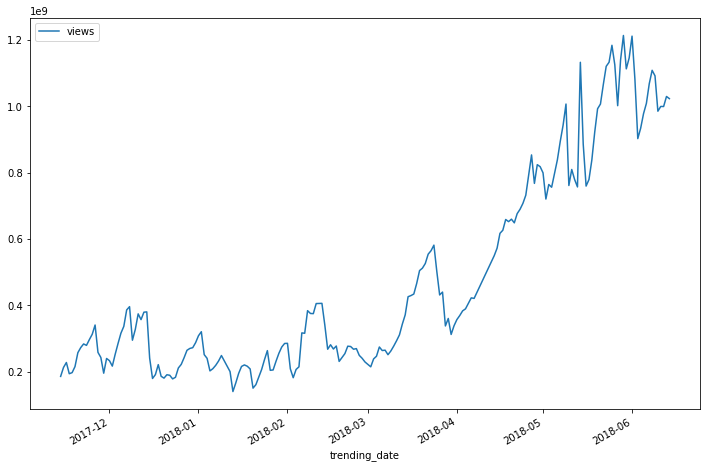

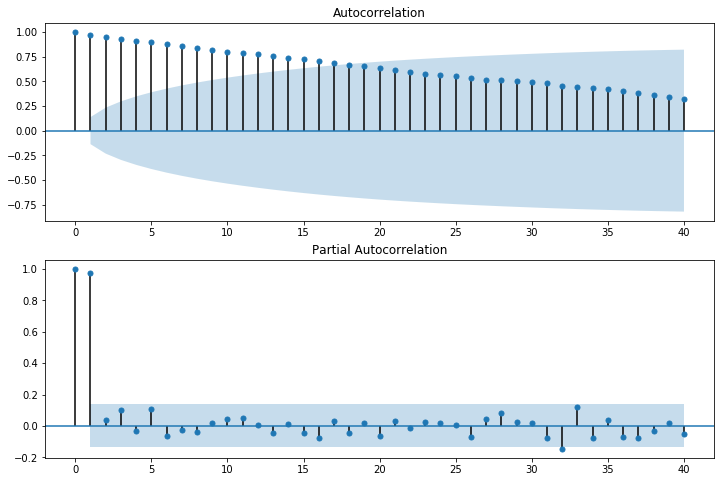

In [10]:
dta = youtube_views2

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [11]:
def get_categoryinfo(data_frame,category):
    cat = category
    data_frame = data_frame.loc[data_frame['category_id'] == cat]
    data_frame['trending_date'] = pd.to_datetime(data_frame['trending_date'])
    data_frame2 = data_frame.groupby('trending_date')['views'].agg({"views": "sum"})
    return data_frame2

In [12]:
#filter data by top 3 categories: music(10), entertainment(24), people & blogs (22)

music = get_categoryinfo(youtube_views,10)
entertainment = get_categoryinfo(youtube_views,24)
ppl_blogs = get_categoryinfo(youtube_views,22)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


# Music

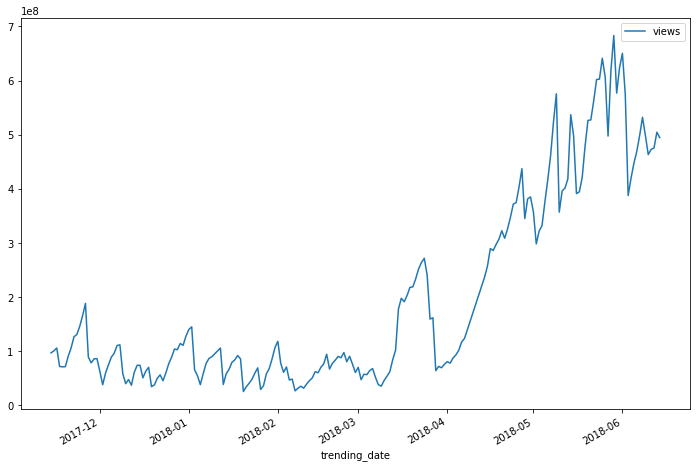

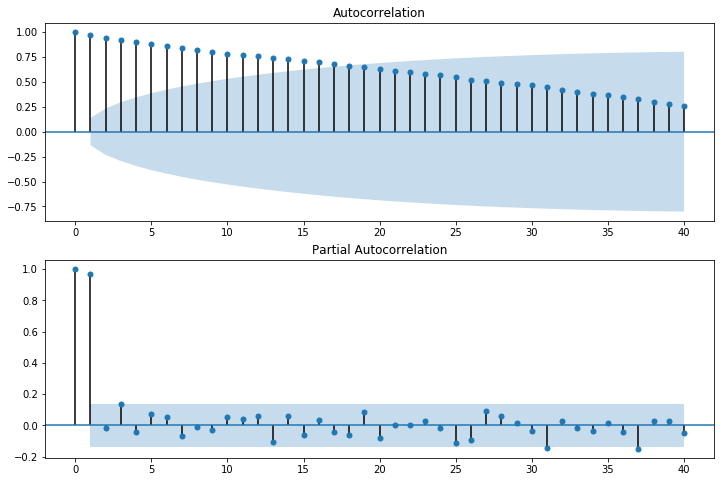

In [13]:
dta = music


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# Entertainment

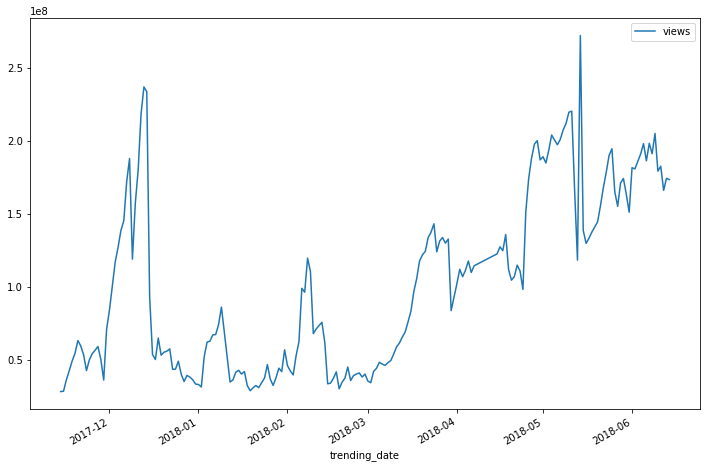

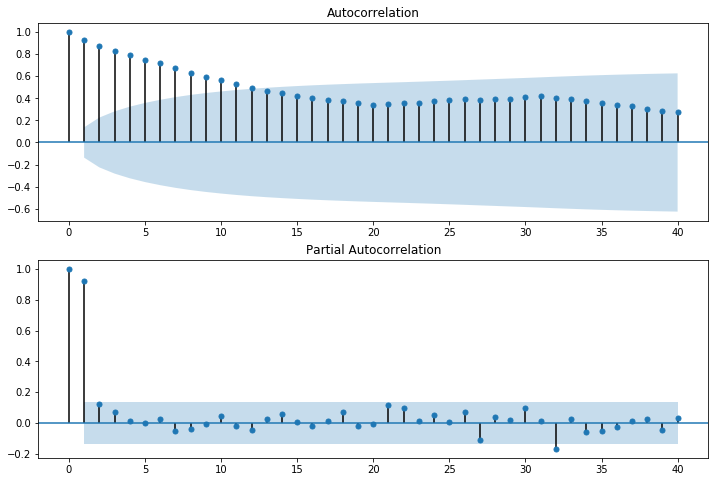

In [14]:
dta = entertainment


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# People & Blogs

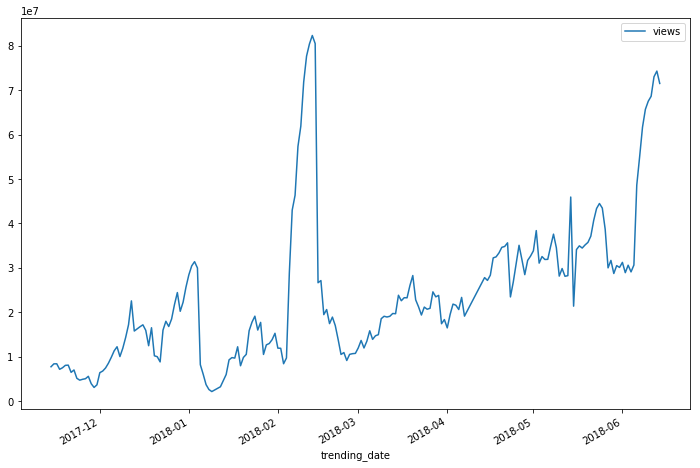

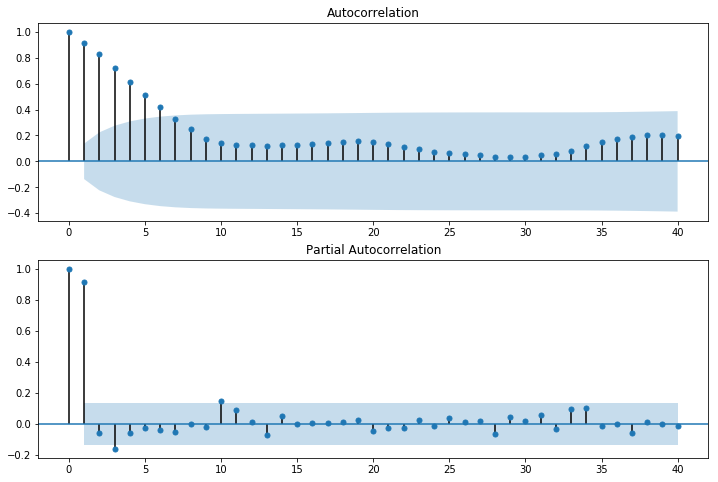

In [15]:
dta = ppl_blogs


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [29]:
dta = dta.astype('float32')

arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit(disp=False)
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)


const          2.398630e+07
ar.L1.views    9.508264e-01
dtype: float64
6981.482493042225 6991.45152297964 6985.514726615682
const          2.398630e+07
ar.L1.views    9.840995e-01
ar.L2.views   -3.621108e-02
dtype: float64
6983.223464212465 6996.515504129018 6988.599775643742
const          2.398630e+07
ar.L1.views    9.775963e-01
ar.L2.views    1.498207e-01
ar.L3.views   -1.967197e-01
dtype: float64
6977.42086691598 6994.035916811672 6984.1412562050755


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [18]:
print(arma_mod10.arroots)
print(arma_mod20.arroots)
print(arma_mod30.arroots)

[1.05171669]
[ 1.05729047 26.11945927]
[-2.32178025  1.10882462  1.97455038]


In [30]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))
print(sm.stats.durbin_watson(arma_mod20.resid.values))
print(sm.stats.durbin_watson(arma_mod30.resid.values))

1.896950196909
1.9741427249228625
1.9865777207994257


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


The durbin watson statistic is a number that tests for autocorrelation in the residuals and is always between 0 and 4, a value of 2 indicates no autocorrelation in the sample. Values from 0 to less than 2 indicate positive autocorrelation.